
**Importing Libraries**


In [1]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from imutils import paths
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import glob

**Defining Path**

In [2]:
from google.colab import drive
df = drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
for current_folder in glob.glob ('/content/drive/My Drive/tb/*'):
  print (current_folder)

/content/drive/My Drive/tb/Tuberculosis
/content/drive/My Drive/tb/Normal


**Working with Data**

In [4]:
Normal=[]
for name1 in glob.glob ('/content/drive/tb/Normal/*'):
  Normal.append(name1)

In [5]:
Tuberculosis=[]
for name2 in glob.glob ('/content/drive/My Drive/tb/Tuberculosis/*'):
  Tuberculosis.append(name2)

**Joining both the folders**

In [6]:
files=Normal+Tuberculosis

In [7]:
files

['/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-10.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-155.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-1.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-124.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-118.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-16.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-150.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-133.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-102.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-140.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-107.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-149.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-148.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-161.png',
 '/content/drive/My Drive/tb/Tuberculosis/Tuberculosis-134.png',
 '/content/drive/My Drive/tb/

**Splitting of Data**

In [8]:
filename =[str(f.split("/")[6]) for f in files]
filename

['Tuberculosis-10.png',
 'Tuberculosis-155.png',
 'Tuberculosis-1.png',
 'Tuberculosis-124.png',
 'Tuberculosis-118.png',
 'Tuberculosis-16.png',
 'Tuberculosis-150.png',
 'Tuberculosis-133.png',
 'Tuberculosis-102.png',
 'Tuberculosis-140.png',
 'Tuberculosis-107.png',
 'Tuberculosis-149.png',
 'Tuberculosis-148.png',
 'Tuberculosis-161.png',
 'Tuberculosis-134.png',
 'Tuberculosis-143.png',
 'Tuberculosis-137.png',
 'Tuberculosis-130.png',
 'Tuberculosis-109.png',
 'Tuberculosis-101.png',
 'Tuberculosis-14.png',
 'Tuberculosis-114.png',
 'Tuberculosis-100.png',
 'Tuberculosis-136.png',
 'Tuberculosis-154.png',
 'Tuberculosis-138.png',
 'Tuberculosis-103.png',
 'Tuberculosis-11.png',
 'Tuberculosis-126.png',
 'Tuberculosis-139.png',
 'Tuberculosis-156.png',
 'Tuberculosis-157.png',
 'Tuberculosis-151.png',
 'Tuberculosis-132.png',
 'Tuberculosis-106.png',
 'Tuberculosis-110.png',
 'Tuberculosis-147.png',
 'Tuberculosis-121.png',
 'Tuberculosis-108.png',
 'Tuberculosis-129.png',
 'Tube

In [9]:
label =[str(f.split("/")[5]) for f in files]
label

['Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis

In [10]:
folder =[str(f.split("/")[0])+"/"+str(f.split("/")[1])+"/"+str(f.split("/")[2])+"/"+str(f.split("/")[3])+"/"+str(f.split("/")[4])+"/"+str(f.split("/")[5]) for f in files]
folder

['/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tuberculosis',
 '/content/drive/My Drive/tb/Tub

**CNN Model Implementation**

In [11]:
!pip install opencv-python imutils matplotlib tensorflow scikit-learn pillow

In [38]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

# Load Data
normal_images = glob.glob('/content/drive/My Drive/tb/Normal/*')
tuberculosis_images = glob.glob('/content/drive/My Drive/tb/Tuberculosis/*')

# Create a dataset
images = normal_images + tuberculosis_images
labels = [0] * len(normal_images) + [1] * len(tuberculosis_images)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Create data generators
batch_size = 32
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/tb',  # Change this path
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

# CNN model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
#class_weights = dict(zip(np.unique(train_classes), class_weights))
#class_weights
#class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    verbose=1,
    class_weight=class_weights_dict)





Found 4200 images belonging to 2 classes.
Epoch 1/5
132/132 [==============================] - 99s 726ms/step - loss: 0.6519 - accuracy: 0.6619
Epoch 2/5
132/132 [==============================] - 96s 724ms/step - loss: 0.4123 - accuracy: 0.8483
Epoch 3/5
132/132 [==============================] - 96s 730ms/step - loss: 0.4320 - accuracy: 0.8300
Epoch 4/5
132/132 [==============================] - 95s 716ms/step - loss: 0.3923 - accuracy: 0.8521
Epoch 5/5
132/132 [==============================] - 96s 727ms/step - loss: 0.3919 - accuracy: 0.8619


In [39]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# ...

# Load and preprocess test images
X_test_preprocessed = []
for img_path in X_test:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize pixel values
    X_test_preprocessed.append(img)

X_test_preprocessed = np.array(X_test_preprocessed)

# Convert y_test to numpy array
y_test = np.array(y_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_preprocessed, y_test, verbose=0)

# Generate predictions
predictions = model.predict(X_test_preprocessed)

# Convert predictions to binary class labels
predictions = np.round(predictions).astype(int)

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions, target_names=['Normal', 'Tuberculosis'])

# Print evaluation metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


27/27 [==============================] - 1s 29ms/step
Test Loss: 0.3466978073120117
Test Accuracy: 0.8928571343421936
Confusion Matrix:
 [[653  50]
 [ 40  97]]
Classification Report:
               precision    recall  f1-score   support

      Normal       0.94      0.93      0.94       703
Tuberculosis       0.66      0.71      0.68       137

    accuracy                           0.89       840
   macro avg       0.80      0.82      0.81       840
weighted avg       0.90      0.89      0.89       840



**Statistical Analysis**

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)


Accuracy: 0.8928571428571429
Precision: 0.6598639455782312
Recall: 0.708029197080292
F1-score: 0.6830985915492958
AUC-ROC: 0.8184527208730051


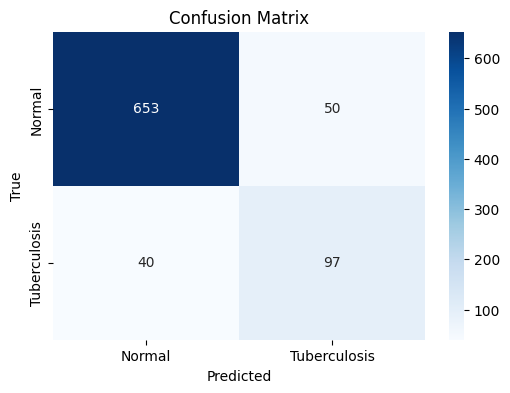

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Normal', 'Tuberculosis'], yticklabels=['Normal', 'Tuberculosis'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


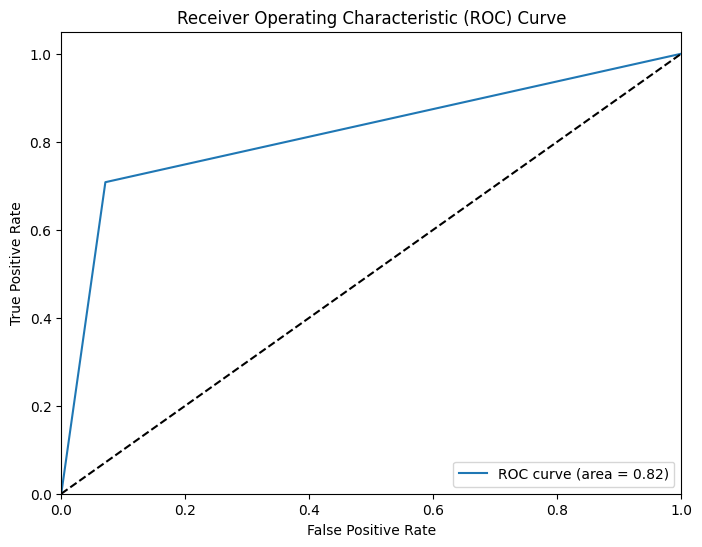

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [43]:
from sklearn.metrics import classification_report

class_rep = classification_report(y_test, predictions, target_names=['Normal', 'Tuberculosis'])
print(class_rep)


              precision    recall  f1-score   support

      Normal       0.94      0.93      0.94       703
Tuberculosis       0.66      0.71      0.68       137

    accuracy                           0.89       840
   macro avg       0.80      0.82      0.81       840
weighted avg       0.90      0.89      0.89       840



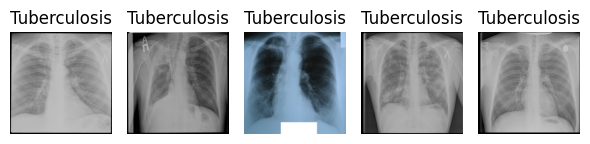

In [44]:
import cv2
import matplotlib.pyplot as plt

# Sample images from each class
num_samples = 5  # Number of samples to visualize
normal_samples = Normal[:num_samples]
tuberculosis_samples = Tuberculosis[:num_samples]

plt.figure(figsize=(6, 6))

# Visualize Normal images
for i, img_path in enumerate(normal_samples):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(img)
    plt.title("Normal")
    plt.axis('off')

# Visualize Tuberculosis images
for i, img_path in enumerate(tuberculosis_samples):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, num_samples, num_samples + i + 1)
    plt.imshow(img)
    plt.title("Tuberculosis")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
